In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the adjusted dataset
df = pd.read_csv("premier_league_adjusted.csv")

#### The distribution of match scores across all matches

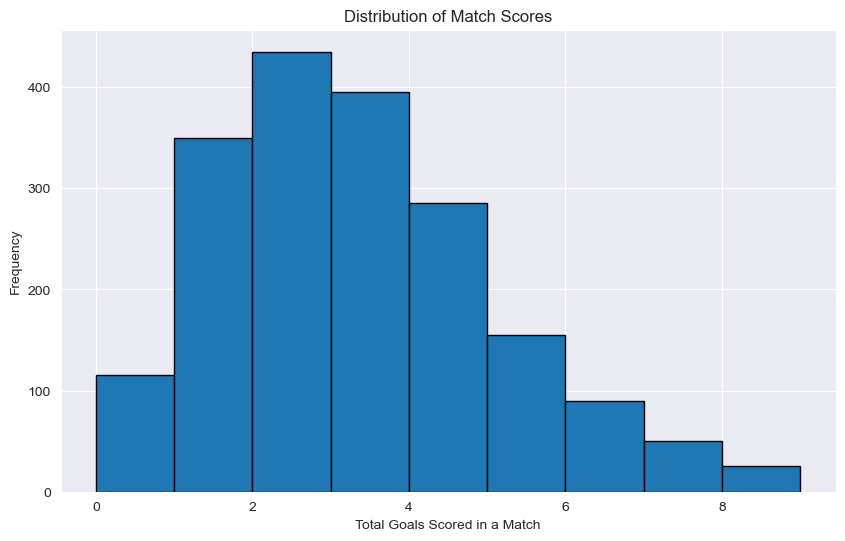

In [4]:
# Replace en dash with hyphen in the 'Score' column
df['Score'] = df['Score'].str.replace('–', '-')

# Extract home and away scores
home_scores = df['Score'].apply(lambda x: int(x.split('-')[0]))
away_scores = df['Score'].apply(lambda x: int(x.split('-')[1]))

# Combine home and away scores to get total match scores
total_scores = home_scores + away_scores

# Plot a histogram to visualize the distribution of match scores
plt.figure(figsize=(10, 6))
plt.hist(total_scores, bins=range(0, max(total_scores) + 1), edgecolor='black')
plt.title('Distribution of Match Scores')
plt.xlabel('Total Goals Scored in a Match')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### The stadiums where significantly more goals are scored on average

In [5]:
# Calculate the average number of goals scored in each stadium
avg_goals_by_stadium = df.groupby('Venue')['Score'].apply(lambda x: sum(int(score.split('-')[0]) + int(score.split('-')[1]) for score in x) / len(x))

# Calculate the overall average number of goals scored
overall_avg_goals = sum(int(score.split('-')[0]) + int(score.split('-')[1]) for score in df['Score']) / len(df)

# Define a threshold for what is considered "significantly more goals"
threshold = 1.2  # You can adjust this threshold as needed

# Find stadiums where the average goals scored exceed the threshold
stadiums_with_significantly_more_goals = avg_goals_by_stadium[avg_goals_by_stadium > threshold * overall_avg_goals]

print("Stadiums with Significantly More Goals Scored on Average:")
print(stadiums_with_significantly_more_goals)

Stadiums with Significantly More Goals Scored on Average:
Venue
Emirates Stadium    4.105263
Etihad Stadium      4.052632
Name: Score, dtype: float64


#### Match outcomes trend based on the day of the week or time of day

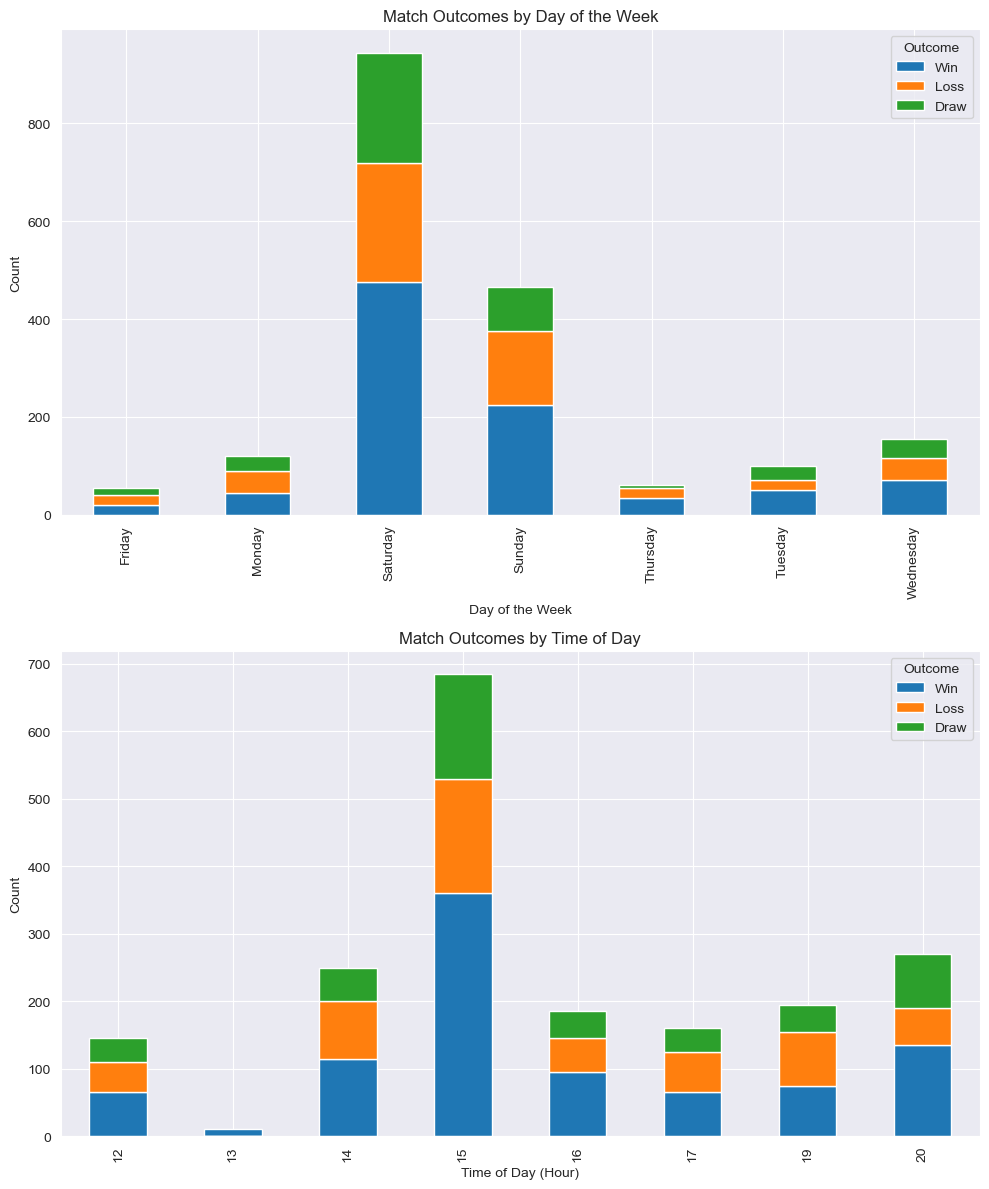

In [9]:
# Extract the day of the week from the 'Date' column
df['Day_of_Week'] = pd.to_datetime(df['Date']).dt.day_name()

# Extract the time of day from the 'Time' column
df['Time_of_Day'] = df['Time'].str.split(':').str[0].astype(int)

# Define a function to determine match outcome (win, loss, draw)
def match_outcome(row):
    home_score, away_score = map(int, row['Score'].split('-'))
    if home_score > away_score:
        return 'Win'
    elif home_score < away_score:
        return 'Loss'
    else:
        return 'Draw'

# Apply the function to each row to create a new column 'Outcome'
df['Outcome'] = df.apply(match_outcome, axis=1)

# Create a pivot table to count match outcomes by day of the week
day_of_week_pivot = df.pivot_table(index='Day_of_Week', columns='Outcome', values='Date', aggfunc='count', fill_value=0)

# Create a pivot table to count match outcomes by time of day
time_of_day_pivot = df.pivot_table(index='Time_of_Day', columns='Outcome', values='Date', aggfunc='count', fill_value=0)

# Plot bar charts to visualize the trends
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

day_of_week_pivot[['Win', 'Loss', 'Draw']].plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Match Outcomes by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Count')

time_of_day_pivot[['Win', 'Loss', 'Draw']].plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Match Outcomes by Time of Day')
axes[1].set_xlabel('Time of Day (Hour)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()